In [1]:
import pandas as pd
import numpy as np
import random as rd # generating random numbers
import datetime # manipulating date formats
# Viz
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # for prettier plots

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [46]:
sales_train = pd.read_csv("../data/sales_train.csv")

In [47]:
sales_train.shape

(2935849, 6)

In [48]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [49]:
# removing the Null values or -VE values
sales_train.drop(sales_train[(sales_train['item_cnt_day']<=0)|(sales_train['item_price']<=0)].index ,axis=0,inplace=True)

In [50]:
sales_train['date']=pd.to_datetime(sales_train['date'],dayfirst=True)

In [51]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
5,2013-01-10,0,25,2564,349.00,1.0


In [52]:
# extracting month and year seperately
sales_train['month_year'] = sales_train['date'].dt.to_period('M')

In [38]:
# sales_train['year'] = sales_train['date'].dt.year
# sales_train['month'] = sales_train['date'].dt.month

In [53]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month_year
0,2013-01-02,0,59,22154,999.00,1.0,2013-01
1,2013-01-03,0,25,2552,899.00,1.0,2013-01
3,2013-01-06,0,25,2554,1709.05,1.0,2013-01
4,2013-01-15,0,25,2555,1099.00,1.0,2013-01
5,2013-01-10,0,25,2564,349.00,1.0,2013-01


In [59]:
new_data = sales_train.groupby(['month_year'])["item_cnt_day"].sum()

In [94]:
new_data = sales_train[['month_year','item_cnt_day']]

In [95]:
new_data.head()

,month_year,item_cnt_day
0,2013-01,1.0
1,2013-01,1.0
3,2013-01,1.0
4,2013-01,1.0
5,2013-01,1.0


In [130]:
processed_data = sales_train.groupby(['month_year'])["item_cnt_day"].sum()

In [132]:
df = pd.DataFrame([data for data in processed_data], index =[processed_data.index], columns={'item_cnt_month'})

In [133]:
df.head()

,item_cnt_month
month_year,
2013-01,131850.0
2013-02,128382.0
2013-03,147438.0
2013-04,107439.0
2013-05,107147.0


In [127]:
df.rename(columns = {0: 'item_cnt_month'}, inplace = True)

In [128]:
df.head()

,item_cnt_month
month_year,
2013-01,131850.0
2013-02,128382.0
2013-03,147438.0
2013-04,107439.0
2013-05,107147.0


In [134]:
y = df

<AxesSubplot:xlabel='month_year'>

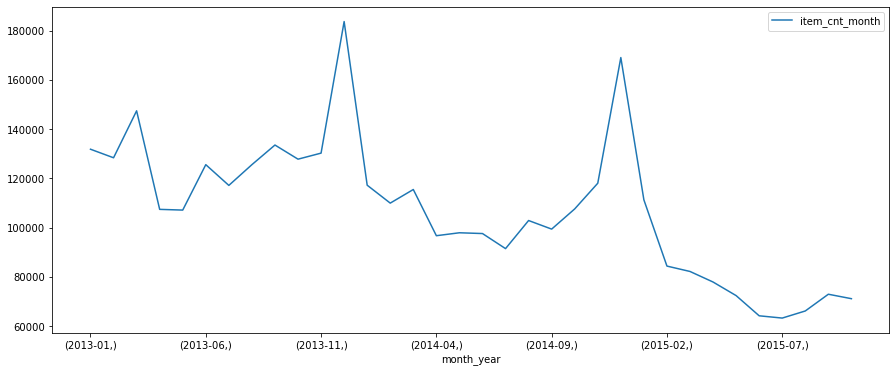

In [135]:
y.plot(figsize=(15, 6))

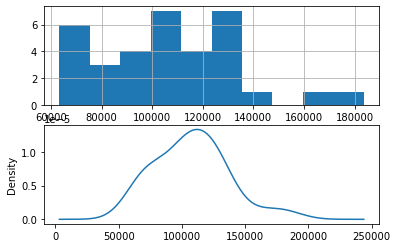

In [136]:
from pandas import Series
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
y.item_cnt_month.hist()
pyplot.subplot(212)
y.item_cnt_month.plot(kind='kde')
pyplot.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(y.item_cnt_month.index.month_year, y.item_cnt_month, ax=ax)

In [143]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicative')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

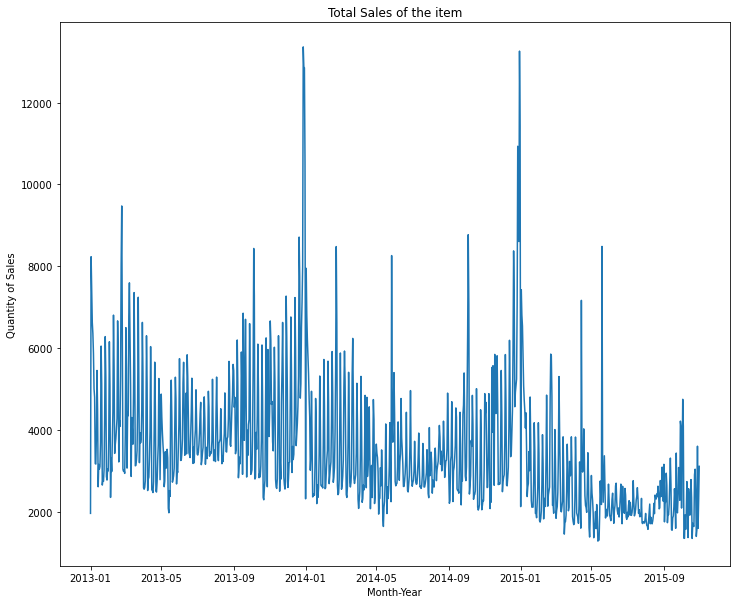

In [56]:
data=sales_train.groupby(["date","date_block_num","shop_id","item_id"])["item_cnt_day"].sum().reset_index()
ts=data.groupby(['date'])['item_cnt_day'].sum()
ts.astype('float')
plt.figure(figsize=(12,10))
plt.title('Total Sales of the item')
plt.xlabel('Month-Year')
plt.ylabel('Quantity of Sales')
plt.plot(ts)

In [30]:
ts.head()

date
2013-01-01    1951.0
2013-01-02    8198.0
2013-01-03    7422.0
2013-01-04    6617.0
2013-01-05    6346.0
Name: item_cnt_day, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12,center=False).mean()
    rolstd = timeseries.rolling(window=12,center=False).std()#window=12, because of yearly trend for both mean and variance
#Plot rolling statistics:
    plt.figure(figsize=(15,10))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

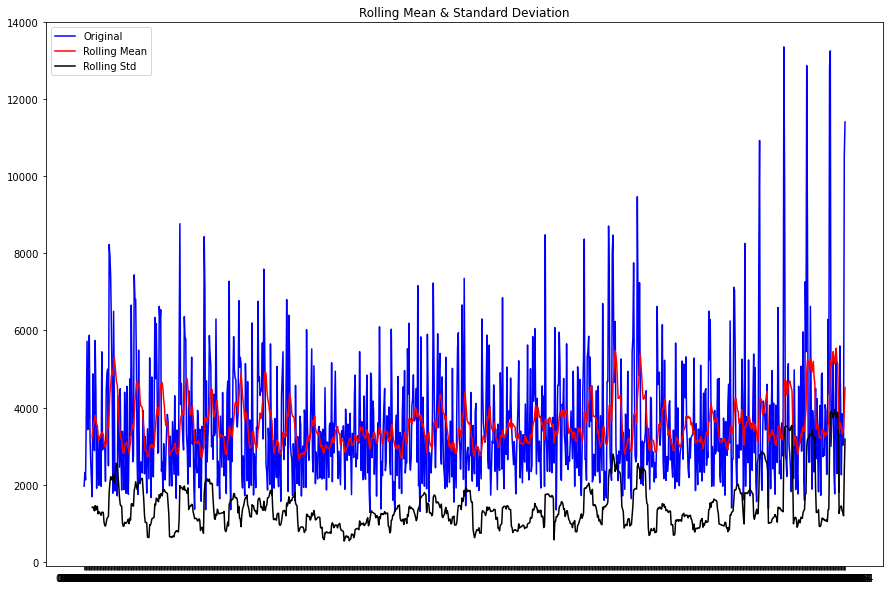

Results of Dickey-Fuller Test:
Test Statistic                -9.420360e+00
p-value                        5.524347e-16
#Lags Used                     2.200000e+01
Number of Observations Used    1.011000e+03
Critical Value (1%)           -3.436835e+00
Critical Value (5%)           -2.864403e+00
Critical Value (10%)          -2.568294e+00
dtype: float64


In [13]:
test_stationarity(ts)

In [14]:
ts_data = pd.DataFrame(ts)

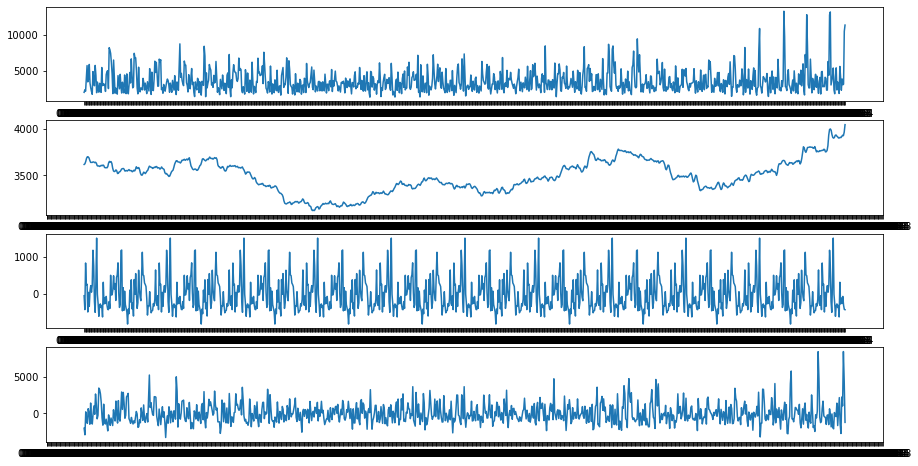

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_data,period=100)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,8))
plt.subplot(411)
plt.plot(ts,label='Orginial')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.subplot(414)
plt.plot(residual,label='Residual')

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


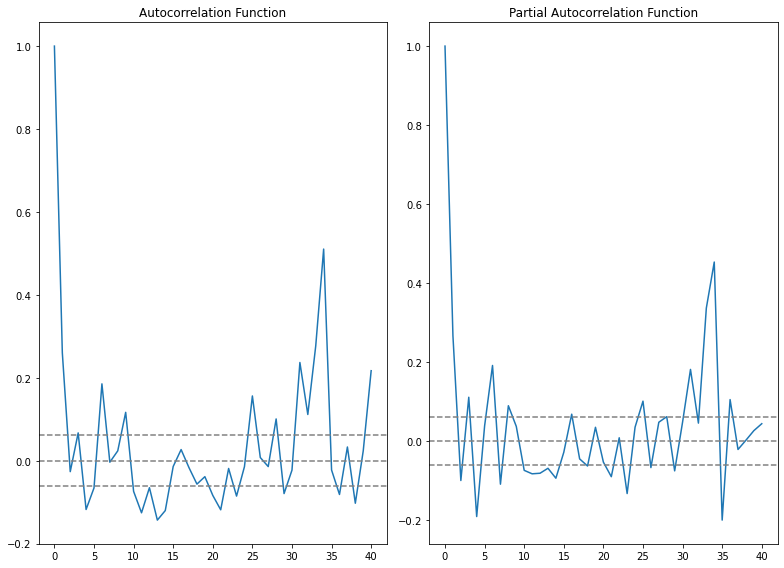

In [16]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(ts,fft=False)
lag_pacf=pacf(ts,method='ols')
plt.figure(figsize=(11,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

AttributeError: 'Series' object has no attribute 'item_cnt_day'

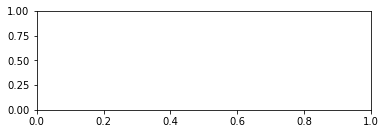

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has bee

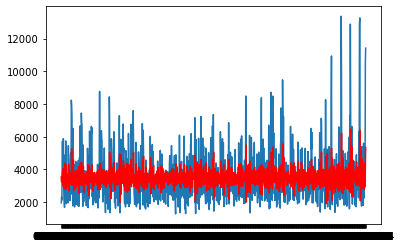

In [20]:
model=ARIMA(ts,order=(2,0,2))
result = model.fit(disp=-1)
plt.plot(ts,label="Original")
plt.plot(result.fittedvalues,color='red',label="Predicted")

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has bee

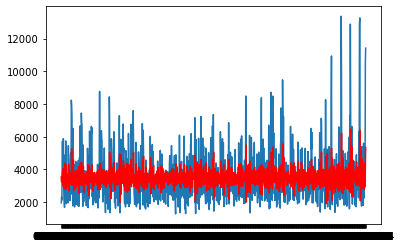

In [21]:
model=ARIMA(ts,order=(2,0,2))
result = model.fit(disp=-1)
plt.plot(ts,label="Original")
plt.plot(result.fittedvalues,color='red',label="Predicted")

In [22]:
forecast_errors = [ts[i]-result.fittedvalues[i] for i in range(len(ts))]
bias = sum(forecast_errors) * 1.0/len(ts)
print('Bias: %f' % bias)
test=pd.read_csv("../data/test.csv")
predictions = pd.DataFrame(result.fittedvalues).reset_index()
predictions.columns=["date","predictions"]
predictions.head()# Monthly sales forecasting

Bias: 0.057976


,date,predictions
0,01.01.2013,3535.368752
1,01.01.2014,3235.290105
2,01.01.2015,3577.863402
3,01.02.2013,3227.478393
4,01.02.2014,3862.078216


In [23]:
predictions.to_csv("../data/ARIMApredictions.csv",index=False)

In [24]:
sample_submission = pd.read_csv("../data/sample_submission.csv")
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [25]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
